## 01) ÁRVORE DE DECISÃO PARA ANÁLISE DE Aprovação de CARTÃO DE CRÉDITO

### Bibliotecas

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Criando o DataFrame

In [ ]:
df = pd.read_csv(r"exercicio1_credito.csv")

In [ ]:
print(len(df))

500


In [ ]:
df.head()

,Idade,Renda_Mensal,Tempo_De_Emprego,Gênero,Estado_Civil,Aprovado
0,56,NaN,NaN,masculino,solteiro,não
1,44,2360.0,22.0,masculino,casado,não
2,27,NaN,NaN,feminino,divorciado,sim
3,43,6691.0,29.0,masculino,casado,não
4,36,7234.0,3.0,feminino,casado,sim


# **Pré Processamento**

In [ ]:
df.shape

(500, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             500 non-null    int64  
 1   Renda_Mensal      450 non-null    float64
 2   Tempo_De_Emprego  450 non-null    float64
 3   Gênero            500 non-null    object 
 4   Estado_Civil      500 non-null    object 
 5   Aprovado          500 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 23.6+ KB


In [ ]:
df.sample()

,Idade,Renda_Mensal,Tempo_De_Emprego,Gênero,Estado_Civil,Aprovado
291,68,2909.0,21.0,feminino,divorciado,não


Padronizar o nome das colunas

In [ ]:
df.columns = (
    df.columns
    .str.strip()           # remove espaços extras no início/fim
    .str.lower()           # coloca tudo em minúsculas
    .str.replace(' ', '_') # substitui espaços por underscore
    .str.replace('[^a-z0-9_]', '', regex=True)  # remove símbolos especiais
)
print(df.columns.tolist())

['idade', 'renda_mensal', 'tempo_de_emprego', 'gnero', 'estado_civil', 'aprovado']


Limpar dados nas colunas categoricas

In [ ]:
colunas_categoricas = ['estado_civil', 'gnero']

for col in colunas_categoricas:
    df[col] = df[col].str.strip().str.lower()

### Transformação

In [ ]:
# Codificar variáveis categóricas em valores numéricos
df['gnero'] = pd.factorize(df['gnero'])[0]  # 'não'=0, 'sim'=1
df['aprovado'] = pd.factorize(df['aprovado'])[0]            # 'não'=0, 'sim'=1

In [ ]:
# Label encoding da coluna estado_civil
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["estado_civil_idx"] = encoder.fit_transform(df["estado_civil"])

print(df)

     idade  renda_mensal  tempo_de_emprego  gnero estado_civil  aprovado  \
0       56           NaN               NaN      0     solteiro         0   
1       44        2360.0              22.0      0       casado         0   
2       27           NaN               NaN      1   divorciado         1   
3       43        6691.0              29.0      0       casado         0   
4       36        7234.0               3.0      1       casado         1   
..     ...           ...               ...    ...          ...       ...   
495     53           NaN               NaN      0       casado         0   
496     46        4986.0              28.0      1     solteiro         1   
497     55           NaN               NaN      0   divorciado         1   
498     50        8088.0              29.0      0     solteiro         1   
499     54        4423.0              19.0      1     solteiro         1   

     estado_civil_idx  
0                   2  
1                   0  
2              

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

estado_civil_idx = df["estado_civil_idx"].values   # vira array numpy

# Definir parâmetros do embedding
num_estado_civil = df["estado_civil_idx"].nunique()  # total de categorias únicas
embedding_dim = 3  # tamanho do vetor (ajustável)


# Criar embedding
# Converter para tensor
input_cat = tf.constant(estado_civil_idx)

# Camada de embedding
embedding_layer = layers.Embedding(input_dim=num_estado_civil, output_dim=embedding_dim)

# Gerar vetores iniciais
vetores_emb = embedding_layer(input_cat)

print("Shape do embedding:", vetores_emb.shape)
print("Vetores gerados (iniciais):\n", vetores_emb.numpy()[:5])  # mostra só 5 exemplos

Shape do embedding: (500, 3)
Vetores gerados (iniciais):
 [[-0.01385521  0.03220547  0.02101583]
 [ 0.02828049  0.04419504  0.03998828]
 [-0.01830144 -0.0335752   0.017177  ]
 [ 0.02828049  0.04419504  0.03998828]
 [ 0.02828049  0.04419504  0.03998828]]


In [ ]:
df.drop(columns=['estado_civil'], inplace=True)

Trarando incompletudes

In [ ]:
df['idade'] = df['idade'].fillna(df['idade'].median())
df['renda_mensal'] = df['renda_mensal'].fillna(df['renda_mensal'].median())
df['tempo_de_emprego'] = df['tempo_de_emprego'].fillna(df['tempo_de_emprego'].median())
df['gnero'] = df['gnero'].fillna(df['gnero'].median())
df['estado_civil_idx'] = df['estado_civil_idx'].fillna(df['estado_civil_idx'].median())

In [ ]:
print(df)

     idade  renda_mensal  tempo_de_emprego  gnero  aprovado  estado_civil_idx
0       56        5995.5              16.0      0         0                 2
1       44        2360.0              22.0      0         0                 0
2       27        5995.5              16.0      1         1                 1
3       43        6691.0              29.0      0         0                 0
4       36        7234.0               3.0      1         1                 0
..     ...           ...               ...    ...       ...               ...
495     53        5995.5              16.0      0         0                 0
496     46        4986.0              28.0      1         1                 2
497     55        5995.5              16.0      0         1                 1
498     50        8088.0              29.0      0         1                 2
499     54        4423.0              19.0      1         1                 2

[500 rows x 6 columns]


### Separando atributos da classe de predição

In [ ]:
# Atributos e alvo
# Cria o conjunto de atributos (ou variáveis independentes), chamado X
# Ele pega todas as colunas do DataFrame df, exceto a coluna 'Aprovado'
X = df.drop(columns=['aprovado'])
# Cria a variável alvo (ou rótulo de classe) chamada y
# Ela contém apenas os valores da coluna 'Aprovado', ou seja, as respostas corretas que o modelo vai tentar aprender.
y = df['aprovado']

In [ ]:
y

,aprovado
0,0
1,0
2,1
3,0
4,1
...,...
495,0
496,1
497,1
498,1


### Treinando o modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#PRÉ-PODA MAIS DETALHADA
modelo = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=5,              # Limita a profundidade da árvore
    min_samples_split=20,     # Mínimo de amostras para dividir um nó
    min_samples_leaf=12,       # Mínimo de amostras em uma folha
    max_leaf_nodes=9         # Número máximo de folhas
)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=9,
                       min_samples_leaf=12, min_samples_split=20,
                       random_state=42)

In [ ]:
# definindo o ccp_alpha
# Coleta os alphas e as árvores correspondentes
path = modelo.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
# Treina uma árvore para cada valor de alpha
modelos = [DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

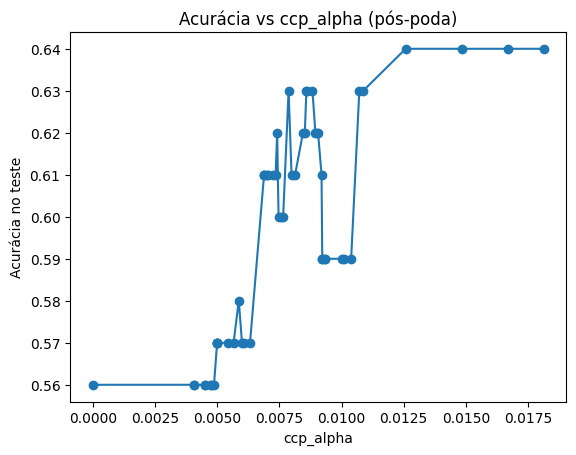

In [ ]:
# Avalia e plota o desempenho
acc_test = [modelo.score(X_test, y_test) for modelo in modelos]
plt.plot(ccp_alphas, acc_test, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia no teste")
plt.title("Acurácia vs ccp_alpha (pós-poda)")
plt.show()

In [ ]:
melhor_alpha = 0.0125
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=melhor_alpha)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0125, criterion='entropy', random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia:.2f}")

Acurácia: 0.63


### Acurácia do modelo

In [ ]:
y_pred = modelo.predict(X_test)
print("\nAcurácia do modelo nos dados de teste:", accuracy_score(y_test, y_pred))


Acurácia do modelo nos dados de teste: 0.63


### Visualizando a árvore

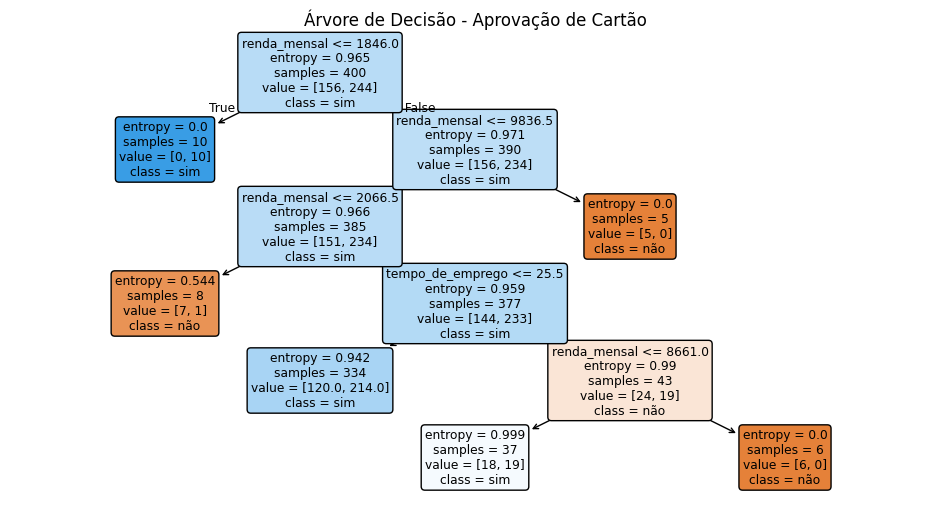

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(modelo, feature_names=X.columns, class_names=['não', 'sim'], filled=True, rounded=True)
plt.title("Árvore de Decisão - Aprovação de Cartão")
plt.show()

### Testando o modelo

In [ ]:
print("\nInsira os dados do cliente para prever a aprovação do Cartão:")

idade = int(input("Idade: "))
renda_mensal = float(input("Renda Mensal (R$): "))
tempo_de_emprego = int(input("Tempo de Emprego (anos): "))
gnero = int(input("Gênero (0 para Homem, 1 para Mulher): "))
estado_civil_idx = int(input("Estado Civil (0 para Solteiro, 1 para Casado, 2 para Divorciado, 3 para Viúvo): "))


Insira os dados do cliente para prever a aprovação do Cartão:
Idade: 32
Renda Mensal (R$): 5000
Tempo de Emprego (anos): 7
Gênero (0 para Homem, 1 para Mulher): 0
Estado Civil (0 para Solteiro, 1 para Casado, 2 para Divorciado, 3 para Viúvo): 0


### Criando a entrada para o modelo

In [ ]:
entrada = pd.DataFrame([{
    'idade': idade,
    'renda_mensal': renda_mensal,
    'tempo_de_emprego': tempo_de_emprego,
    'gnero': gnero,
    'estado_civil_idx': estado_civil_idx
}])
entrada

,idade,renda_mensal,tempo_de_emprego,gnero,estado_civil_idx
0,32,5000.0,7,0,0


In [ ]:
resultado = modelo.predict(entrada)[0]
print("\n✅ Resultado da previsão:")
print("Cartão Aprovado!" if resultado == 1 else "Cartão NÃO Aprovado.")


✅ Resultado da previsão:
Cartão Aprovado!


## 02) ÁRVORE DE DECISÃO PARA ANÁLISE DE RISCO

### Bibliotecas

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Criando o DataFrame

In [ ]:
df = pd.read_csv(r"exercicio2_medico.csv")

In [ ]:
print(len(df))

500


In [ ]:
df.head(10)

,Idade,IMC,Glicose,Atividade_Física,Histórico_Familiar,Risco
0,71,36.84,97.0,baixa,não,baixo
1,39,23.99,156.0,moderada,não,alto
2,52,26.66,168.0,alta,não,alto
3,29,33.61,196.0,moderada,sim,alto
4,54,26.68,86.0,moderada,não,baixo
5,67,28.74,155.0,baixa,sim,alto
6,79,17.89,176.0,alta,sim,alto
7,67,30.75,98.0,alta,não,baixo
8,52,22.01,82.0,baixa,sim,baixo
9,34,27.07,96.0,alta,sim,baixo


# **Pré Processamento**

In [ ]:
df.shape

(500, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Idade               500 non-null    int64  
 1   IMC                 450 non-null    float64
 2   Glicose             450 non-null    float64
 3   Atividade_Física    500 non-null    object 
 4   Histórico_Familiar  500 non-null    object 
 5   Risco               500 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 23.6+ KB


In [ ]:
df.sample()

,Idade,IMC,Glicose,Atividade_Física,Histórico_Familiar,Risco
410,70,29.48,79.0,alta,não,baixo


Padronizar o nome das colunas

In [ ]:
df.columns = (
    df.columns
    .str.strip()           # remove espaços extras no início/fim
    .str.lower()           # coloca tudo em minúsculas
    .str.replace(' ', '_') # substitui espaços por underscore
)
print(df.columns.tolist())

['idade', 'imc', 'glicose', 'atividade_física', 'histórico_familiar', 'risco']


Limpar dados nas colunas categoricas

In [ ]:
colunas_categoricas = ['atividade_física', 'histórico_familiar', 'risco']

for col in colunas_categoricas:
    df[col] = df[col].str.strip().str.lower()

### Transformação

In [ ]:
# Codificar variáveis categóricas em valores numéricos
df['risco'] = pd.factorize(df['risco'])[0]            # 'baixo'=0, 'alto'=1
df['histórico_familiar'] = pd.factorize(df['histórico_familiar'])[0]            # 'não'=0, 'sim'=1

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Exemplo para a coluna 'atividade_física'
encoder = LabelEncoder()
df['atividade_física_idx'] = encoder.fit_transform(df['atividade_física'])

print(df)

     idade    imc  glicose atividade_física  histórico_familiar  risco  \
0       71  36.84     97.0            baixa                   0      0   
1       39  23.99    156.0         moderada                   0      1   
2       52  26.66    168.0             alta                   0      1   
3       29  33.61    196.0         moderada                   1      1   
4       54  26.68     86.0         moderada                   0      0   
..     ...    ...      ...              ...                 ...    ...   
495     32    NaN      NaN         moderada                   0      0   
496     56  26.36     72.0            baixa                   1      0   
497     69  24.01     74.0            baixa                   1      0   
498     20  18.83    186.0            baixa                   0      1   
499     58  30.40     71.0             alta                   1      0   

     atividade_física_idx  
0                       1  
1                       2  
2                       0  

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

atividade_física_idx = df["atividade_física_idx"].values   # vira array numpy

# Definir parâmetros do embedding
num_atividade_física = df["atividade_física_idx"].nunique()  # total de categorias únicas
embedding_dim = 2  # tamanho do vetor (ajustável)


# Criar embedding
# Converter para tensor
input_cat = tf.constant(atividade_física_idx)

# Camada de embedding
embedding_layer = layers.Embedding(input_dim=num_atividade_física, output_dim=embedding_dim)

# Gerar vetores iniciais
vetores_emb = embedding_layer(input_cat)

print("Shape do embedding:", vetores_emb.shape)
print("Vetores gerados (iniciais):\n", vetores_emb.numpy()[:5])  # mostra só 5 exemplos

Shape do embedding: (500, 2)
Vetores gerados (iniciais):
 [[-0.02417094  0.02367571]
 [-0.02571526 -0.040141  ]
 [ 0.02786468 -0.01288658]
 [-0.02571526 -0.040141  ]
 [-0.02571526 -0.040141  ]]


In [ ]:
df.drop(columns=['atividade_física'], inplace=True)

Tratando incompletudes

In [ ]:
df['idade'] = df['idade'].fillna(df['idade'].median())
df['imc'] = df['imc'].fillna(df['imc'].median())
df['glicose'] = df['glicose'].fillna(df['glicose'].median())
df['histórico_familiar'] = df['histórico_familiar'].fillna(df['histórico_familiar'].median())
df['atividade_física_idx'] = df['atividade_física_idx'].fillna(df['atividade_física_idx'].median())

In [ ]:
print(df)

     idade    imc  glicose  histórico_familiar  risco  atividade_física_idx
0       71  36.84     97.0                   0      0                     1
1       39  23.99    156.0                   0      1                     2
2       52  26.66    168.0                   0      1                     0
3       29  33.61    196.0                   1      1                     2
4       54  26.68     86.0                   0      0                     2
..     ...    ...      ...                 ...    ...                   ...
495     32  28.17     91.5                   0      0                     2
496     56  26.36     72.0                   1      0                     1
497     69  24.01     74.0                   1      0                     1
498     20  18.83    186.0                   0      1                     1
499     58  30.40     71.0                   1      0                     0

[500 rows x 6 columns]


### Separando atributos da classe de predição

In [ ]:
# Atributos e alvo
# Cria o conjunto de atributos (ou variáveis independentes), chamado X
# Ele pega todas as colunas do DataFrame df, exceto a coluna 'Aprovado'
X = df.drop(columns=['risco'])
# Cria a variável alvo (ou rótulo de classe) chamada y
# Ela contém apenas os valores da coluna 'Aprovado', ou seja, as respostas corretas que o modelo vai tentar aprender.
y = df['risco']

In [ ]:
y

,risco
0,0
1,1
2,1
3,1
4,0
...,...
495,0
496,0
497,0
498,1


### Treinando o modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#PRÉ-PODA MAIS DETALHADA
modelo = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=6,              # Limita a profundidade da árvore
    min_samples_split=20,     # Mínimo de amostras para dividir um nó
    min_samples_leaf=12,       # Mínimo de amostras em uma folha
    max_leaf_nodes=10         # Número máximo de folhas
)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10,
                       min_samples_leaf=12, min_samples_split=20,
                       random_state=42)

In [ ]:
# predição
y_pred = modelo.predict(X_test)
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia:.2f}")

Acurácia: 0.95


### Acurácia do modelo

In [ ]:
y_pred = modelo.predict(X_test)
print("\nAcurácia do modelo nos dados de teste:", accuracy_score(y_test, y_pred))


Acurácia do modelo nos dados de teste: 0.95


In [ ]:
# A árvore é totalmente construída e depois simplificada.
# Use ccp_alpha (parâmetro de poda de complexidade de custo).
# A ideia é testar diferentes valores de ccp_alpha e escolher o melhor via validação cruzada

modelo_completo = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo_completo.fit(X_train, y_train)
# definindo o ccp_alpha
# Coleta os alphas e as árvores correspondentes
path = modelo_completo.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Treina uma árvore para cada valor de alpha
modelos = [DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

In [ ]:
melhor_alpha = 0.01
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=melhor_alpha)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)
from sklearn.metrics import accuracy_score

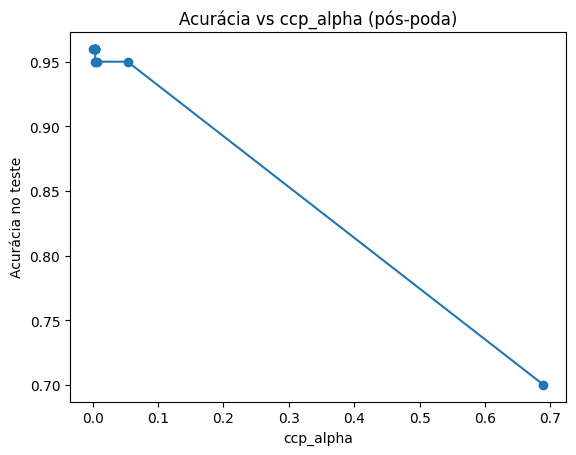

In [ ]:
# Avalia e plota o desempenho
acc_test = [modelo.score(X_test, y_test) for modelo in modelos]
plt.plot(ccp_alphas, acc_test, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia no teste")
plt.title("Acurácia vs ccp_alpha (pós-poda)")
plt.show()

### Visualizando a árvore

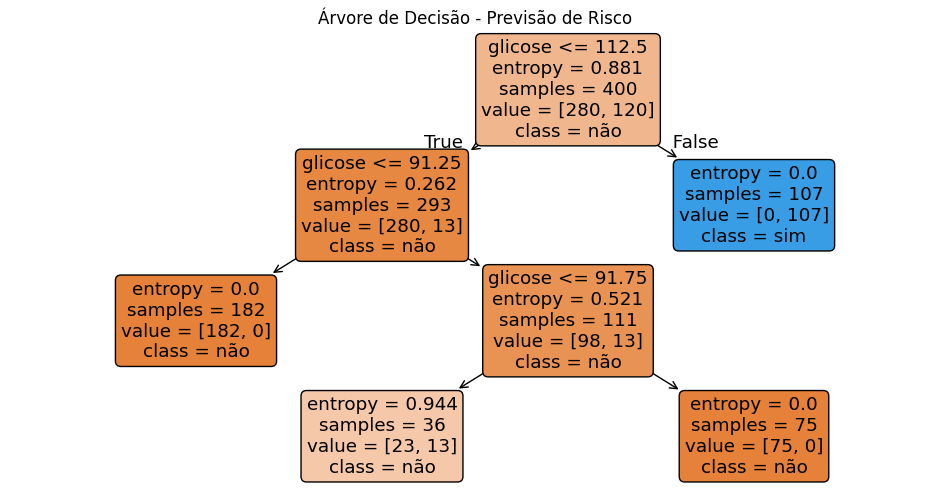

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(modelo, feature_names=X.columns, class_names=['não', 'sim'], filled=True, rounded=True)
plt.title("Árvore de Decisão - Previsão de Risco")
plt.show()

### Testando o modelo

In [ ]:
print("\nInsira os dados do cliente para prever o risco:")

idade = int(input("Idade: "))
imc = float(input("imc: "))
glicose = int(input("glicose: "))
histórico_familiar = int(input("histórico_familiar (0 para não, 1 para sim): "))
atividade_física_idx = int(input("atividade física (0 para baixa, 1 para moderada, 2 para alta): "))


Insira os dados do cliente para prever o risco:
Idade: 32
imc: 23
glicose: 192
histórico_familiar (0 para não, 1 para sim): 1
atividade física (0 para baixa, 1 para moderada, 2 para alta): 1


### Criando a entrada para o modelo

In [ ]:
entrada = pd.DataFrame([{
    'idade': idade,
    'imc': imc,
    'glicose': glicose,
    'histórico_familiar': histórico_familiar,
    'atividade_física_idx': atividade_física_idx
}])
entrada

,idade,imc,glicose,histórico_familiar,atividade_física_idx
0,32,23.0,192,1,1


In [ ]:
resultado = modelo.predict(entrada)[0]
print("\n✅ Resultado da previsão:")
print("Baixo Risco!" if resultado == 1 else "Alto Risco.")


✅ Resultado da previsão:
Baixo Risco!


## 03) ÁRVORE DE DECISÃO PARA ANÁLISE DE DEMISSÃO

### Bibliotecas

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Criando o DataFrame

In [ ]:
df = pd.read_csv(r"exercicio3_funcionarios.csv")

In [ ]:
print(len(df))

500


In [ ]:
df.head()

,Idade,Tempo_na_Empresa,Satisfação,Departamento,Grau_Instrução,Demissão
0,58,13.0,2.2,RH,técnico,não
1,31,7.0,4.3,Vendas,técnico,não
2,37,8.0,4.2,Vendas,superior,não
3,36,9.0,1.4,RH,pós,não
4,47,12.0,1.5,RH,pós,não


# **Pré Processamento**

In [ ]:
df.shape

(500, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             500 non-null    int64  
 1   Tempo_na_Empresa  450 non-null    float64
 2   Satisfação        450 non-null    float64
 3   Departamento      500 non-null    object 
 4   Grau_Instrução    500 non-null    object 
 5   Demissão          500 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 23.6+ KB


In [ ]:
df.sample()

,Idade,Tempo_na_Empresa,Satisfação,Departamento,Grau_Instrução,Demissão
208,55,1.0,2.0,TI,superior,não


Padronizar o nome das colunas

In [ ]:
df.columns = (
    df.columns
    .str.strip()           # remove espaços extras no início/fim
    .str.lower()           # coloca tudo em minúsculas
    .str.replace(' ', '_') # substitui espaços por underscore
)
print(df.columns.tolist())

['idade', 'tempo_na_empresa', 'satisfação', 'departamento', 'grau_instrução', 'demissão']


Limpar dados nas colunas categoricas

In [ ]:
colunas_categoricas = ['departamento', 'grau_instrução', 'demissão']

for col in colunas_categoricas:
    df[col] = df[col].str.strip().str.lower()

### Transformação

In [ ]:
# Codificar variáveis categóricas em valores numéricos
df['demissão'] = pd.factorize(df['demissão'])[0]  # 'não'=0, 'sim'=1

In [ ]:
# Label encoding da coluna estado_civil
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["departamento_idx"] = encoder.fit_transform(df["departamento"])

df["grau_instruo_idx"] = encoder.fit_transform(df["grau_instrução"])

print(df)

     idade  tempo_na_empresa  satisfação departamento grau_instrução  \
0       58              13.0         2.2           rh        técnico   
1       31               7.0         4.3       vendas        técnico   
2       37               8.0         4.2       vendas       superior   
3       36               9.0         1.4           rh            pós   
4       47              12.0         1.5           rh            pós   
..     ...               ...         ...          ...            ...   
495     33              10.0         3.8       vendas          médio   
496     42               5.0         3.9     produção        técnico   
497     45               7.0         3.4           rh          médio   
498     22               7.0         2.2           ti       superior   
499     40               0.0         3.6           ti       superior   

     demissão  departamento_idx  grau_instruo_idx  
0           0                 1                 3  
1           0                 3

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

grau_instruo_idx = df["grau_instruo_idx"].values   # vira array numpy

# Definir parâmetros do embedding
num_grau_instruo = df["grau_instruo_idx"].nunique()  # total de categorias únicas
embedding_dim = 3  # tamanho do vetor (ajustável)


# Criar embedding
# Converter para tensor
input_cat = tf.constant(grau_instruo_idx)

# Camada de embedding
embedding_layer = layers.Embedding(input_dim=num_grau_instruo, output_dim=embedding_dim)

# Gerar vetores iniciais
vetores_emb = embedding_layer(input_cat)

print("Shape do embedding:", vetores_emb.shape)
print("Vetores gerados (iniciais):\n", vetores_emb.numpy()[:5])  # mostra só 5 exemplos

Shape do embedding: (500, 3)
Vetores gerados (iniciais):
 [[-0.00349379  0.03912916 -0.00809314]
 [-0.00349379  0.03912916 -0.00809314]
 [ 0.03495223 -0.03841799 -0.02821543]
 [ 0.01711173 -0.00768272  0.02142353]
 [ 0.01711173 -0.00768272  0.02142353]]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

departamento_idx = df["departamento_idx"].values   # vira array numpy

# Definir parâmetros do embedding
num_departamento = df["departamento_idx"].nunique()  # total de categorias únicas
embedding_dim = 3  # tamanho do vetor (ajustável)


# Criar embedding
# Converter para tensor
input_cat = tf.constant(departamento_idx)

# Camada de embedding
embedding_layer = layers.Embedding(input_dim=num_departamento, output_dim=embedding_dim)

# Gerar vetores iniciais
vetores_emb = embedding_layer(input_cat)

print("Shape do embedding:", vetores_emb.shape)
print("Vetores gerados (iniciais):\n", vetores_emb.numpy()[:5])  # mostra só 5 exemplos

Shape do embedding: (500, 3)
Vetores gerados (iniciais):
 [[ 0.04817652  0.02122078 -0.03081037]
 [ 0.00559062  0.00173511 -0.0364161 ]
 [ 0.00559062  0.00173511 -0.0364161 ]
 [ 0.04817652  0.02122078 -0.03081037]
 [ 0.04817652  0.02122078 -0.03081037]]


In [ ]:
df.drop(columns=['departamento', 'grau_instrução'], inplace=True)

Trarando incompletudes

In [ ]:
df['idade'] = df['idade'].fillna(df['idade'].median())
df['tempo_na_empresa'] = df['tempo_na_empresa'].fillna(df['tempo_na_empresa'].median())
df['satisfação'] = df['satisfação'].fillna(df['satisfação'].median())
df['departamento_idx'] = df['departamento_idx'].fillna(df['departamento_idx'].median())
df['grau_instruo_idx'] = df['grau_instruo_idx'].fillna(df['grau_instruo_idx'].median())

In [ ]:
print(df)

     idade  tempo_na_empresa  satisfação  demissão  departamento_idx  \
0       58              13.0         2.2         0                 1   
1       31               7.0         4.3         0                 3   
2       37               8.0         4.2         0                 3   
3       36               9.0         1.4         0                 1   
4       47              12.0         1.5         0                 1   
..     ...               ...         ...       ...               ...   
495     33              10.0         3.8         0                 3   
496     42               5.0         3.9         0                 0   
497     45               7.0         3.4         0                 1   
498     22               7.0         2.2         0                 2   
499     40               0.0         3.6         1                 2   

     grau_instruo_idx  
0                   3  
1                   3  
2                   2  
3                   1  
4              

### Separando atributos da classe de predição

In [ ]:
# Atributos e alvo
# Cria o conjunto de atributos (ou variáveis independentes), chamado X
# Ele pega todas as colunas do DataFrame df, exceto a coluna 'Aprovado'
X = df.drop(columns=['demissão'])
# Cria a variável alvo (ou rótulo de classe) chamada y
# Ela contém apenas os valores da coluna 'Aprovado', ou seja, as respostas corretas que o modelo vai tentar aprender.
y = df['demissão']

In [ ]:
y

,demissão
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


### Treinando o modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=5,              # Limita a profundidade da árvore
    min_samples_split=10,     # Mínimo de amostras para dividir um nó
    min_samples_leaf=5,       # Mínimo de amostras em uma folha
    max_leaf_nodes=10         # Número máximo de folhas
)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

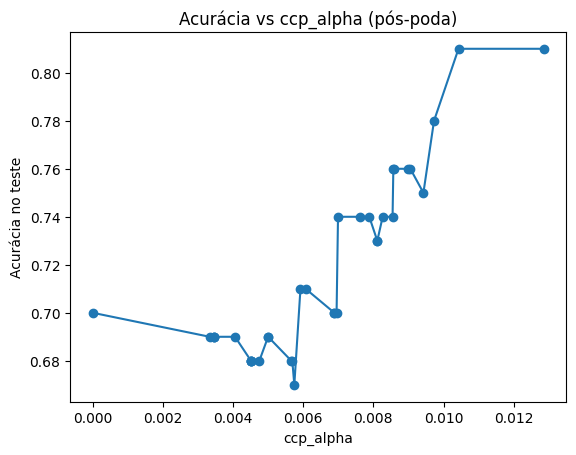

In [ ]:
modelo_completo = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo_completo.fit(X_train, y_train)

# definindo o ccp_alpha
# Coleta os alphas e as árvores correspondentes
path = modelo_completo.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

modelos = [DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

acc_test = [modelo.score(X_test, y_test) for modelo in modelos]
plt.plot(ccp_alphas, acc_test, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia no teste")
plt.title("Acurácia vs ccp_alpha (pós-poda)")
plt.show()

In [ ]:
melhor_alpha = 0.011
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=melhor_alpha)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.011, criterion='entropy', random_state=42)

### Acurácia do modelo

In [ ]:
y_pred = modelo.predict(X_test)
print("\nAcurácia do modelo nos dados de teste:", accuracy_score(y_test, y_pred))


Acurácia do modelo nos dados de teste: 0.81


### Visualizando a árvore

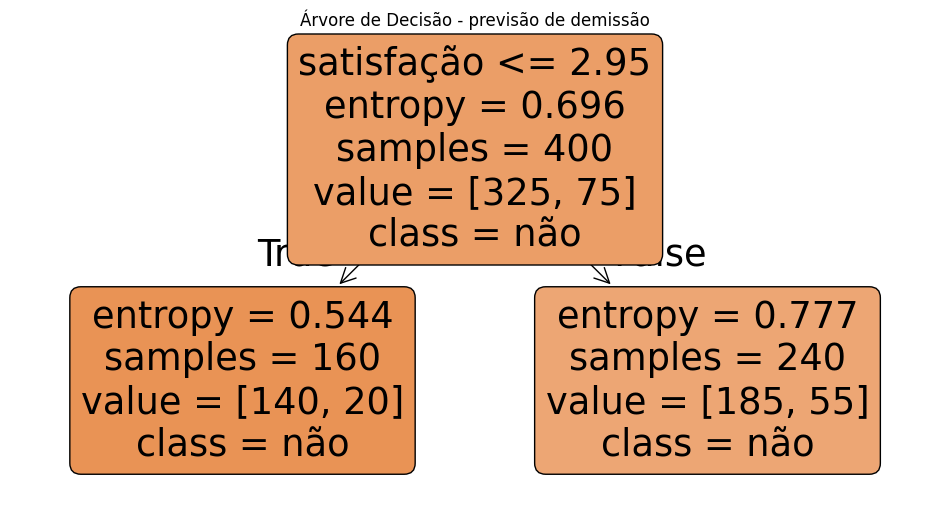

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(modelo, feature_names=X.columns, class_names=['não', 'sim'], filled=True, rounded=True)
plt.title("Árvore de Decisão - previsão de demissão")
plt.show()

### Testando o modelo

In [ ]:

print("\nInsira os dados do cliente para prever a aprovação do Cartão:")

idade = int(input("Idade: "))
tempo_na_empresa = float(input("tempo_de_empresa em anos: "))
satisfação = int(input("satisfação de 1 a 5: "))
departamento_idx = int(input("departamento de 0 a 3:"))
grau_instruo_idx = int(input(" Ecolaridade de 0 a 3: "))


Insira os dados do cliente para prever a aprovação do Cartão:
Idade: 32
tempo_de_empresa em anos: 3
satisfação de 1 a 5: 3
departamento de 0 a 3:3
 Ecolaridade de 0 a 3: 3


### Criando a entrada para o modelo

In [ ]:
entrada = pd.DataFrame([{
    'idade': idade,
    'tempo_na_empresa': tempo_na_empresa,
    'satisfação': satisfação,
    'departamento_idx': departamento_idx,
    'grau_instruo_idx': grau_instruo_idx
}])
entrada

,idade,tempo_na_empresa,satisfação,departamento_idx,grau_instruo_idx
0,32,3.0,3,3,3


In [ ]:
resultado = modelo.predict(entrada)[0]
print("\n✅ Resultado da previsão:")
print("Baixa chance de demissão!" if resultado == 0 else "Existe chance de demissão.")


✅ Resultado da previsão:
Baixa chance de demissão!
